## Tugas Data Processing - Rekayasa Data 2024
Syaifullah Hilmi Ma'arij | 22/497775/TK/54568


# **Import Library**
Import semua library yang akan digunakan dalam data processing

In [333]:
# Import necessary libraries for data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import os
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Dataset yang Digunakan**
Berikut merupakan overview dari dataset dalam tugas ini

In [334]:
# Load the dataset
df = pd.read_csv('./ispu_dki_all.csv')

# Display the first few rows of the dataset to understand its structure
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,NaN,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,NaN,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


In [335]:
df.tail()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
4621,2023-11-26,DKI1 (Bunderan HI),55.0,75.0,43.0,15.0,15.0,25.0,75.0,PM25,SEDANG
4622,2023-11-27,DKI3 (Jagakarsa),54.0,77.0,56.0,13.0,27.0,16.0,77.0,PM25,SEDANG
4623,2023-11-28,DKI1 (Bunderan HI),62.0,96.0,45.0,15.0,29.0,34.0,96.0,PM25,SEDANG
4624,2023-11-29,DKI4 (Lubang Buaya),71.0,105.0,30.0,19.0,22.0,14.0,105.0,PM25,TIDAK SEHAT
4625,2023-11-30,DKI1 (Bunderan HI),38.0,67.0,43.0,12.0,34.0,34.0,67.0,PM25,SEDANG


Dapat dilihat bahwa beberapa kolom berupa fitur numerik dan fitur kategorikal. Fitur numerik seperti 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2', dan 'max'. Sedangkan fitur kategorikal berupa 'tanggal', 'stasiun', 'critical', dan 'categori'.

In [336]:
print("\nShape of the dataset:")
print(df.shape)
print("\nDataset information:")
df.info()


Shape of the dataset:
(4626, 11)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4626 non-null   object 
 1   stasiun   4626 non-null   object 
 2   pm10      4466 non-null   float64
 3   pm25      723 non-null    float64
 4   so2       4607 non-null   float64
 5   co        4618 non-null   float64
 6   o3        4621 non-null   float64
 7   no2       4618 non-null   float64
 8   max       4626 non-null   float64
 9   critical  4625 non-null   object 
 10  categori  4626 non-null   object 
dtypes: float64(7), object(4)
memory usage: 397.7+ KB


## Statistik Deskriptif Fitur Numerik dan Kategorikal

### Fitur Numerik

In [337]:
# Select numerical columns from your dataset
numerical_features = df.select_dtypes(include=['float64']).columns
numerical_dataset = df[numerical_features]

# Describe numerical features and transpose the result for better visualization
numerical_feature_description = numerical_dataset.describe().T

# Add columns for missing values percentage, cardinality (unique values), and mode statistics
numerical_feature_description['missing %'] = round((1 - numerical_dataset.count() / len(numerical_dataset)) * 100, 2)
numerical_feature_description['cardinality'] = numerical_dataset.nunique()
numerical_feature_description['1st mode'] = numerical_dataset.mode().iloc[0]
numerical_feature_description['1st mode %'] = round((numerical_dataset.mode().iloc[0] / numerical_dataset.count()) * 100, 2)

# Display the formatted table
print("Numerical Features Description:")
numerical_feature_description

Numerical Features Description:


,count,mean,std,min,25%,50%,75%,max,missing %,cardinality,1st mode,1st mode %
pm10,4466.0,65.086879,19.243150,0.0,54.0,64.0,75.0,179.0,3.46,131,66.0,1.48
pm25,723.0,94.374827,27.427553,23.0,76.0,94.0,111.0,287.0,84.37,123,93.0,12.86
so2,4607.0,28.183851,13.822107,0.0,18.0,27.0,34.0,126.0,0.41,87,30.0,0.65
co,4618.0,30.263534,13.640344,0.0,21.0,29.0,37.0,134.0,0.17,94,30.0,0.65
o3,4621.0,86.586670,50.295879,0.0,51.0,78.0,110.0,314.0,0.11,264,65.0,1.41
no2,4618.0,18.120832,8.451605,0.0,13.0,17.0,21.0,134.0,0.17,75,15.0,0.32
max,4626.0,99.432123,43.284775,0.0,70.0,91.0,118.0,314.0,0.00,244,63.0,1.36


Walau terdapat fitur dengan missing% yang tinggi, cardinality dari fitur numerik tidak ditemukan kejanggalan (Variance tidak 0)

### Fitur Kategorikal


In [338]:
categorical_features = df.select_dtypes(include=['object']).columns

# For categorical features
categorical_dataset = df[categorical_features]
categorical_feature_description = categorical_dataset.describe().T

# Add columns for missing values percentage and mode statistics for categorical data
categorical_feature_description['missing %'] = round((1 - categorical_dataset.count() / len(categorical_dataset)) * 100, 2)
categorical_feature_description['cardinality'] = categorical_dataset.nunique()
categorical_feature_description['1st mode'] = categorical_dataset.mode().iloc[0]


# Print
print("\nCategorical Features Description:")
categorical_feature_description



Categorical Features Description:


,count,unique,top,freq,missing %,cardinality,1st mode
tanggal,4626,4626,2010-01-01,1,0.00,4626,2010-01-01
stasiun,4626,5,DKI4 (Lubang Buaya),1592,0.00,5,DKI4 (Lubang Buaya)
critical,4625,6,O3,2884,0.02,6,O3
categori,4626,6,SEDANG,2574,0.00,6,SEDANG


## Plot Data Awal

<Figure size 1000x600 with 0 Axes>

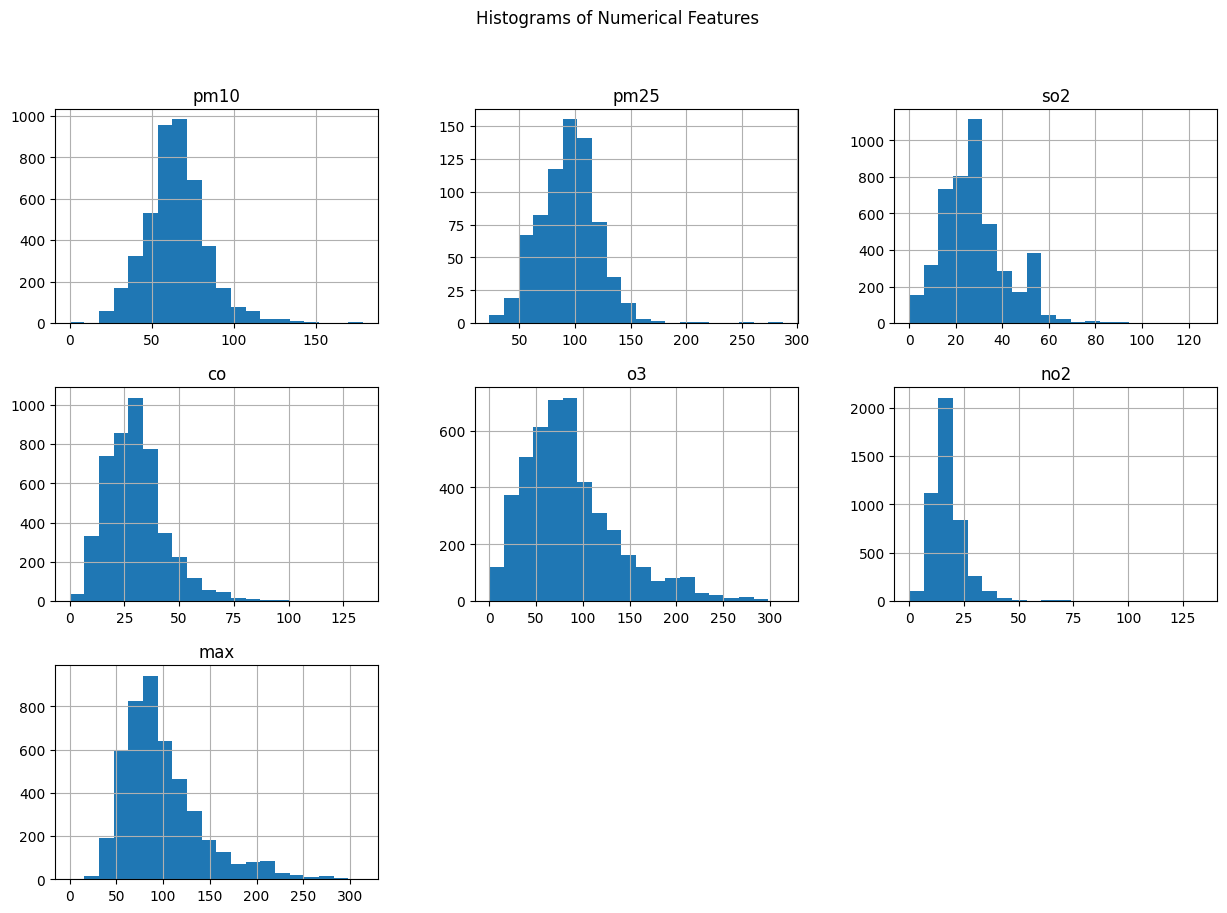

In [339]:
# Plotting numerical features
plt.figure(figsize=(10, 6))
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

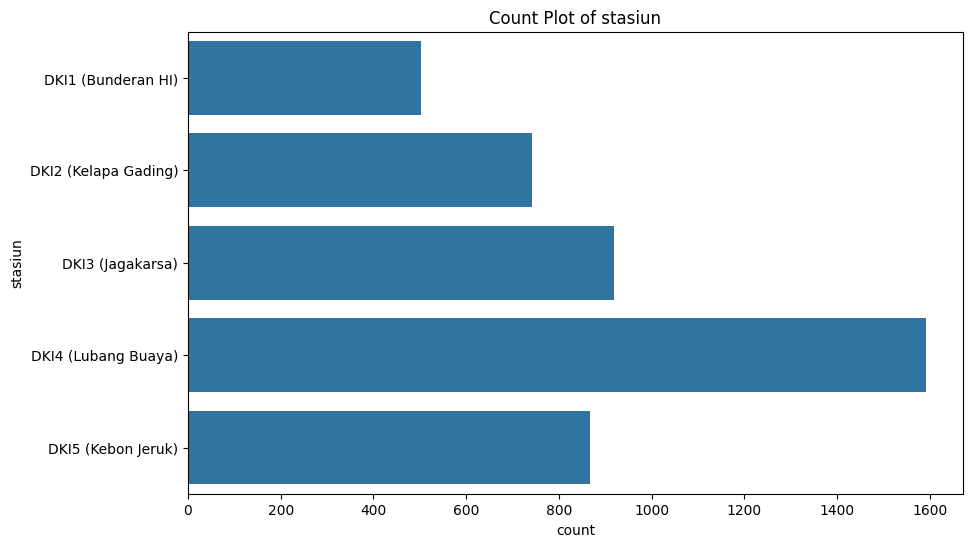

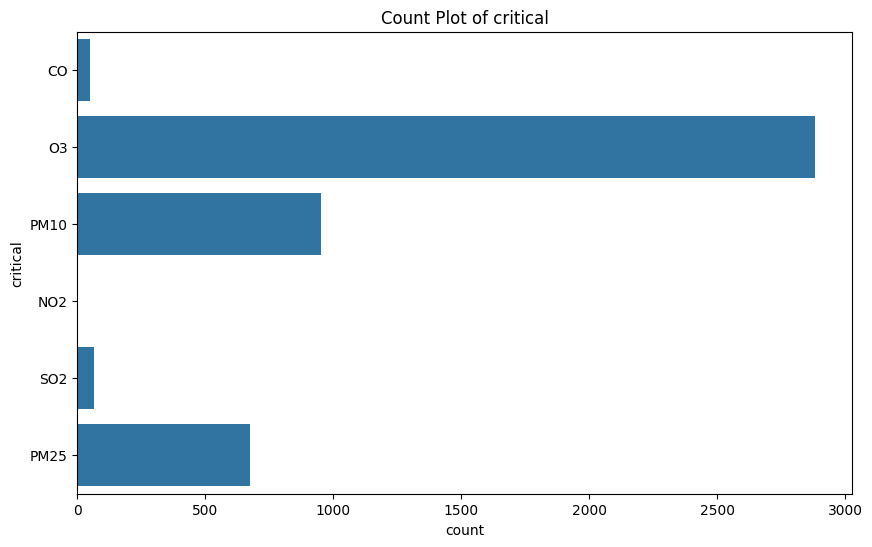

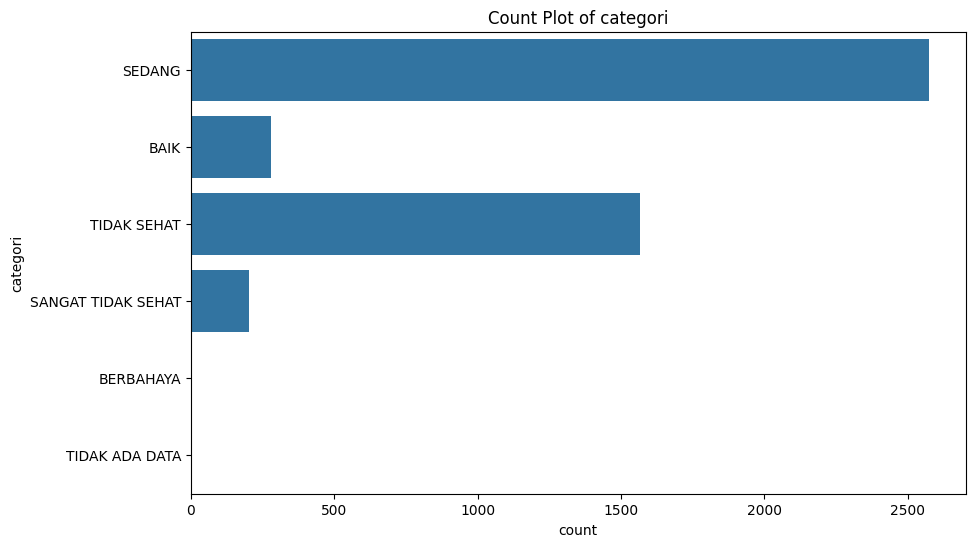

In [340]:
# Plot categorical features using count plot
for col in categorical_features:
    if col != 'tanggal':  # Skip 'tanggal' column during plotting
        plt.figure(figsize=(10, 6))
        sns.countplot(y=col, data=df)
        plt.title(f'Count Plot of {col}')
        plt.show()

# **Bersih - Bersih Data**

## Cek Duplikat Kolom

In [341]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


Tidak ada kolom yang terduplikasi, maka aman untuk dilanjutkan

## Cek Data Hilang

In [342]:
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
tanggal        0
stasiun        0
pm10         160
pm25        3903
so2           19
co             8
o3             5
no2            8
max            0
critical       1
categori       0
dtype: int64


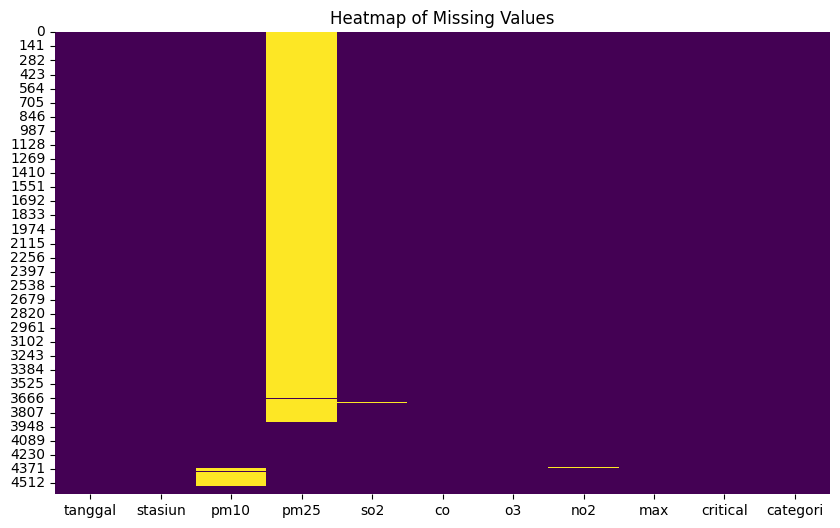

In [343]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

Dapat dilihat bahwa missing value pada pm25 sangatlah parah (Jika dilihat dari table describe sebelumnya, terlihat bahwa fitur ini punya missing value sebesar 84.37%), tentu keputusan untuk drop merupakan hal yang tepat.

Sedangkan, untuk fitur lain, melakukan impute dapat mengatasi masalah missing value ini

### Fix Missing Value

#### Drop pm25
Drop fitur pm25 karena mempunyai nilai missing value yang sangat besar

In [344]:
df_clean = df.drop(columns="pm25")

karena pada fitur 'critical' terdapat nilai yang menandakan polusi yang memiliki konsentrasi tertinggi untuk tanggal dan stasiun tersebut, maka terdapat nilai 'PM25'. Agar nantinya tetap bisa mencari korelasi, maka row yang memiliki nilai 'critical' = 'PM25' akan dihapus

In [345]:
# Remove rows where critical is 'PM25'
df_clean = df_clean[df_clean['critical'] != 'PM25']

#### Impute Missing Value lainnya

In [346]:
# Impute missing values for 'critical' using the mode (most frequent value)
df_clean['critical'].fillna(df_clean['critical'].mode()[0], inplace=True)

Impute untuk numerik fitur { pm10, so2, co, o3, no2 }

In [347]:
# List of numerical columns with missing values that need imputation
numerical_columns_with_missing = ['pm10', 'so2', 'co', 'o3', 'no2']

# Impute missing values with the mean for each column
for col in numerical_columns_with_missing:
    df_clean[col].fillna(df_clean[col].mean(), inplace=True)

# Check if there are any remaining missing values
print("Remaining missing values after imputation:")
print(df_clean.isnull().sum())

Remaining missing values after imputation:
tanggal     0
stasiun     0
pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64


In [348]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3951 entries, 0 to 4615
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   3951 non-null   object 
 1   stasiun   3951 non-null   object 
 2   pm10      3951 non-null   float64
 3   so2       3951 non-null   float64
 4   co        3951 non-null   float64
 5   o3        3951 non-null   float64
 6   no2       3951 non-null   float64
 7   max       3951 non-null   float64
 8   critical  3951 non-null   object 
 9   categori  3951 non-null   object 
dtypes: float64(6), object(4)
memory usage: 339.5+ KB


## Hapus Outliers

In [349]:
# Remove outliers using the IQR method on df_clean
def remove_outliers(df_clean):
    Q1 = df_clean[['pm10', 'so2', 'co', 'o3', 'no2', 'max']].quantile(0.25)
    Q3 = df_clean[['pm10', 'so2', 'co', 'o3', 'no2', 'max']].quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df_clean[['pm10', 'so2', 'co', 'o3', 'no2', 'max']] < (Q1 - 1.5 * IQR)) |
             (df_clean[['pm10', 'so2', 'co', 'o3', 'no2', 'max']] > (Q3 + 1.5 * IQR))).any(axis=1)
    df_clean2 = df_clean[mask]
    return df_clean2


df_clean2 = remove_outliers(df_clean)

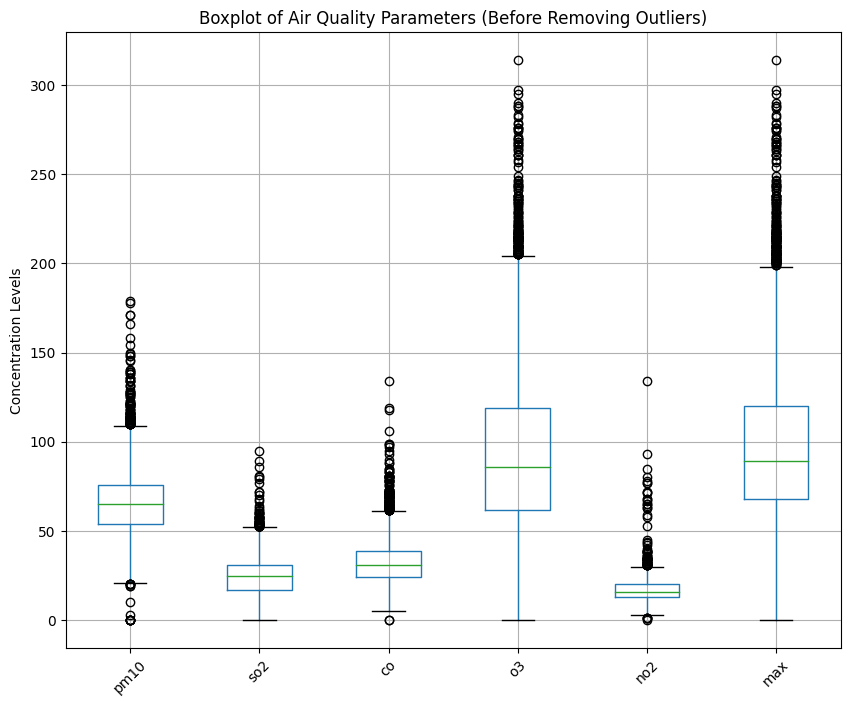

In [350]:
# Visualize the boxplot for the columns to show outliers
plt.figure(figsize=(10, 8))
df_clean[['pm10', 'so2', 'co', 'o3', 'no2', 'max']].boxplot()
plt.title('Boxplot of Air Quality Parameters (Before Removing Outliers)')
plt.ylabel('Concentration Levels')
plt.xticks(rotation=45)
plt.show()

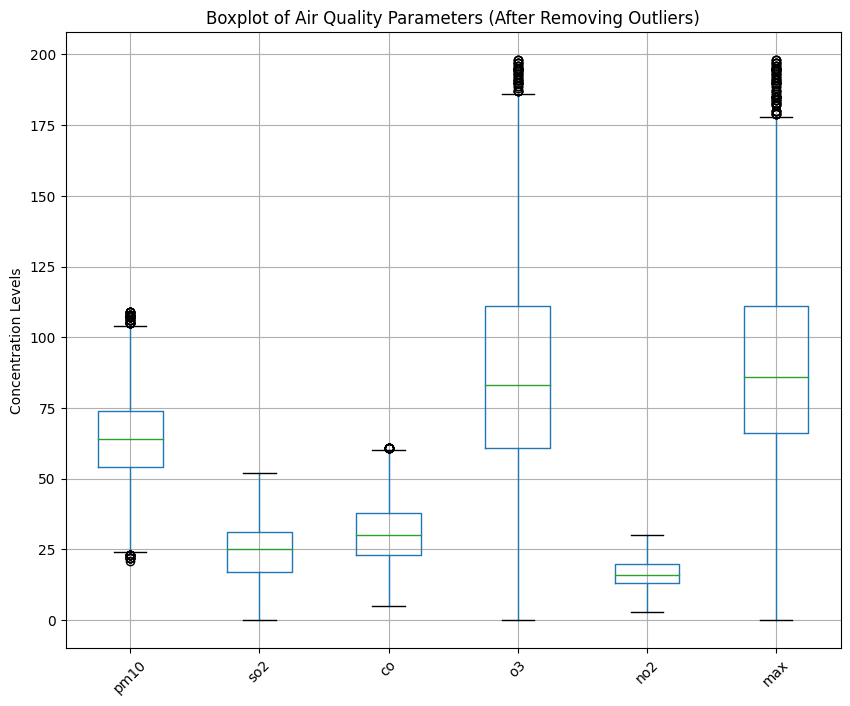

In [351]:
# Visualize the boxplot for the columns after removing outliers
plt.figure(figsize=(10, 8))
df_clean2[['pm10', 'so2', 'co', 'o3', 'no2', 'max']].boxplot()
plt.title('Boxplot of Air Quality Parameters (After Removing Outliers)')
plt.ylabel('Concentration Levels')
plt.xticks(rotation=45)
plt.show()

In [352]:
print("Shape setelah menghapus outliers")
df_clean2.shape

df_clean2.info()
print("Jumlah data setelah drop outliers:", len(df_clean2))

Shape setelah menghapus outliers
<class 'pandas.core.frame.DataFrame'>
Index: 3400 entries, 1 to 4615
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   3400 non-null   object 
 1   stasiun   3400 non-null   object 
 2   pm10      3400 non-null   float64
 3   so2       3400 non-null   float64
 4   co        3400 non-null   float64
 5   o3        3400 non-null   float64
 6   no2       3400 non-null   float64
 7   max       3400 non-null   float64
 8   critical  3400 non-null   object 
 9   categori  3400 non-null   object 
dtypes: float64(6), object(4)
memory usage: 292.2+ KB
Jumlah data setelah drop outliers: 3400


# Feature


In [353]:
# Pindah dataset ke dataframe baru (mempermudah)
df_new = df_clean2

Filter categori untuk menghilangkan 'TIDAK ADA DATA'. Walau pada aslinya memang sudah tidak ada, hal ini dilakukan untuk menghilangkan nilai fitur yang tidak penting (karena 0)

In [354]:
# Filter
df_new = df_new[df_new['categori'] != 'TIDAK ADA DATA']

In [355]:
print("Data untuk fitur pm10:")
df_new.groupby('categori')['pm10'].agg(['sum', 'mean', 'max', 'min','count'])

Data untuk fitur pm10:


,sum,mean,max,min,count
categori,,,,,
BAIK,10271.0,38.324627,50.0,22.0,268
SEDANG,128975.0,63.347250,100.0,21.0,2036
TIDAK SEHAT,77682.0,70.942466,109.0,27.0,1095


In [356]:
print("Data untuk fitur s02:")
df_new.groupby('categori')['so2'].agg(['sum', 'mean', 'max', 'min','count'])

Data untuk fitur s02:


,sum,mean,max,min,count
categori,,,,,
BAIK,4899.000000,18.279851,50.0,0.0,268
SEDANG,50025.387097,24.570426,52.0,0.0,2036
TIDAK SEHAT,28961.451613,26.448814,52.0,2.0,1095


In [357]:
print("Data untuk fitur co:")
df_new.groupby('categori')['co'].agg(['sum', 'mean', 'max', 'min','count'])

Data untuk fitur co:


,sum,mean,max,min,count
categori,,,,,
BAIK,7241.0,27.018657,50.0,6.0,268
SEDANG,64698.0,31.777014,61.0,5.0,2036
TIDAK SEHAT,34101.0,31.142466,61.0,6.0,1095


In [358]:
print("Data untuk fitur o3:")
df_new.groupby('categori')['o3'].agg(['sum', 'mean', 'max', 'min','count'])

Data untuk fitur o3:


,sum,mean,max,min,count
categori,,,,,
BAIK,9638.0,35.962687,50.0,0.0,268
SEDANG,145411.0,71.419941,100.0,0.0,2036
TIDAK SEHAT,145884.0,133.227397,198.0,54.0,1095


In [359]:
print("Data untuk fitur no2:")
df_new.groupby('categori')['no2'].agg(['sum', 'mean', 'max', 'min','count'])

Data untuk fitur no2:


,sum,mean,max,min,count
categori,,,,,
BAIK,3110.0,11.604478,27.0,3.0,268
SEDANG,32879.0,16.148821,30.0,3.0,2036
TIDAK SEHAT,19690.0,17.981735,30.0,5.0,1095


In [360]:
print("Data untuk fitur max:")
df_new.groupby('categori')['max'].agg(['sum', 'mean', 'max', 'min','count'])

Data untuk fitur max:


,sum,mean,max,min,count
categori,,,,,
BAIK,11439.0,42.682836,50.0,22.0,268
SEDANG,155120.0,76.188605,100.0,51.0,2036
TIDAK SEHAT,146799.0,134.063014,198.0,101.0,1095


## Ubah Kategorikal Menjadi Numerik
Hal ini dilakukan untuk memperoleh correlation analysis nantinya

In [361]:
# Replace the categorical values in the 'categori', 'critical', and 'stasiun' columns with numeric representations
df_new['categori'] = df_new['categori'].map({'BAIK': 0, 'SEDANG': 1, 'TIDAK SEHAT': 2})
df_new['critical'] = df_new['critical'].map({'PM10': 0, 'CO': 1, 'O3': 2, 'SO2': 3, 'NO2': 4})

# For 'stasiun', I'll map the unique stations to numerical values
stasiun_mapping = {station: idx for idx, station in enumerate(df_new['stasiun'].unique())}
df_new['stasiun'] = df_new['stasiun'].map(stasiun_mapping)

# Display the first few rows to confirm the replacements
df_new.head()


,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
1,2010-01-02,0,32.0,2.0,16.0,33.0,9.0,33.0,2,0
2,2010-01-03,0,27.0,2.0,19.0,20.0,9.0,27.0,0,0
3,2010-01-04,0,22.0,2.0,16.0,15.0,6.0,22.0,0,0
4,2010-01-05,0,25.0,2.0,17.0,15.0,8.0,25.0,0,0
5,2010-01-06,0,30.0,3.0,22.0,19.0,11.0,30.0,0,0


In [362]:
df_new.tail()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
4346,2023-02-24,3,51.0,26.0,9.0,10.0,17.0,51.0,0,1
4351,2023-03-01,0,38.0,50.0,8.0,19.0,27.0,50.0,3,0
4352,2023-03-02,0,29.0,47.0,11.0,21.0,27.0,47.0,3,0
4382,2023-04-01,0,34.0,51.0,11.0,20.0,19.0,51.0,3,1
4615,2023-11-20,4,46.0,30.0,13.0,81.0,12.0,81.0,2,1


In [363]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3399 entries, 1 to 4615
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   3399 non-null   object 
 1   stasiun   3399 non-null   int64  
 2   pm10      3399 non-null   float64
 3   so2       3399 non-null   float64
 4   co        3399 non-null   float64
 5   o3        3399 non-null   float64
 6   no2       3399 non-null   float64
 7   max       3399 non-null   float64
 8   critical  3399 non-null   int64  
 9   categori  3399 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 421.1+ KB


## Ekstrak fitur tanggal

In [364]:
# Convert 'tanggal' to datetime format
df_new['tanggal'] = pd.to_datetime(df_new['tanggal'], format='%Y-%m-%d')

# Extracting year and month as separate columns
df_new['year'] = df_new['tanggal'].dt.year
df_new['month'] = df_new['tanggal'].dt.month

# Drop the original 'tanggal' column as it's now represented by 'year' and 'month'
df_new = df_new.drop(columns=['tanggal'])

In [365]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3399 entries, 1 to 4615
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stasiun   3399 non-null   int64  
 1   pm10      3399 non-null   float64
 2   so2       3399 non-null   float64
 3   co        3399 non-null   float64
 4   o3        3399 non-null   float64
 5   no2       3399 non-null   float64
 6   max       3399 non-null   float64
 7   critical  3399 non-null   int64  
 8   categori  3399 non-null   int64  
 9   year      3399 non-null   int32  
 10  month     3399 non-null   int32  
dtypes: float64(6), int32(2), int64(3)
memory usage: 421.1 KB


# Analysis Korelasi

## Heatmap Correlation

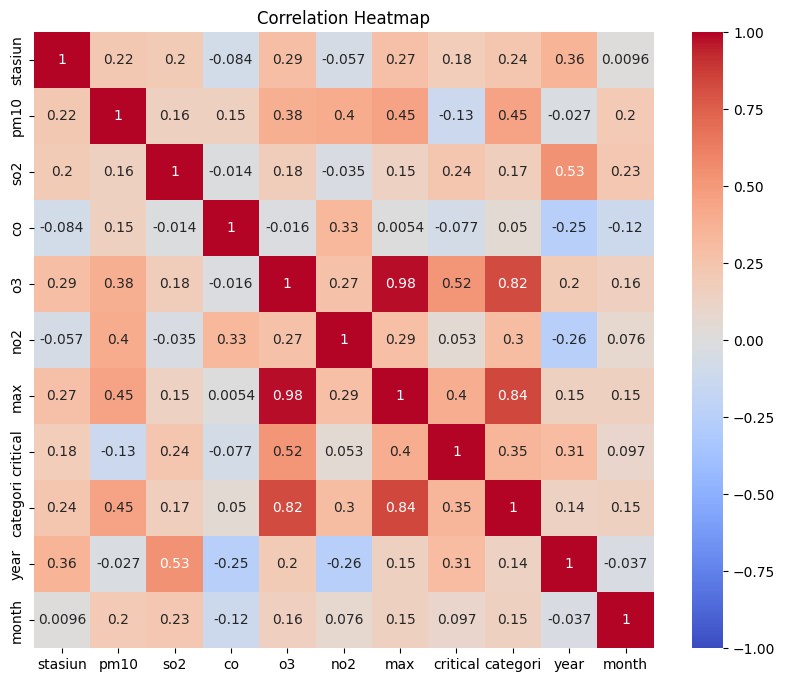

In [366]:
# Generate the correlation matrix
correlation_matrix = df_new.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Sedikit rangkuman mengenai correlation tersebut

In [367]:
# Generate the correlation matrix again (replace 'df_new' with your actual DataFrame name)
correlation_matrix = df_new.corr()

# Flatten the correlation matrix and reset the index
corr_df = correlation_matrix.unstack().reset_index()

# Rename the columns for easier reference
corr_df.columns = ['Feature1', 'Feature2', 'Correlation']

# Remove self-correlations (i.e., when Feature1 == Feature2)
corr_df = corr_df[corr_df['Feature1'] != corr_df['Feature2']]

# Drop duplicate pairs (since correlations are symmetric, we only want one of the pair)
corr_df['abs_correlation'] = corr_df['Correlation'].abs()  # To identify absolute correlations
corr_df = corr_df.drop_duplicates(subset=['abs_correlation'])

# Sort by the highest positive correlations and display the top 10
positive_corr_df = corr_df[corr_df['Correlation'] > 0]
top_10_positive_correlations = positive_corr_df.sort_values('Correlation', ascending=False).head(10)

# Display the result
top_10_positive_correlations


,Feature1,Feature2,Correlation,abs_correlation
50,o3,max,0.978371,0.978371
74,max,categori,0.843215,0.843215
52,o3,categori,0.822235,0.822235
31,so2,year,0.533051,0.533051
51,o3,critical,0.516444,0.516444
19,pm10,categori,0.450806,0.450806
17,pm10,max,0.445629,0.445629
16,pm10,no2,0.399660,0.399660
73,max,critical,0.397672,0.397672
15,pm10,o3,0.383804,0.383804


Fitur o3 dan max menduduki nilai correlation tertinggi dengan nilai 0.97

# Principal Component Analysis

## PCA tanpa specifying n_components

In [368]:
# Assuming df_new is your DataFrame with the features
features = ['stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max', 'critical', 'categori', 'year', 'month']

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new[features])

# Apply PCA without specifying n_components (computes all components)
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Print explained variance ratio for each component
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.2f}")

# If needed, create a DataFrame of the PCA results
df_pca = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(len(explained_variance))])

# Display the DataFrame with the principal components
df_pca.head()


Principal Component 1: 0.33
Principal Component 2: 0.18
Principal Component 3: 0.11
Principal Component 4: 0.10
Principal Component 5: 0.09
Principal Component 6: 0.06
Principal Component 7: 0.05
Principal Component 8: 0.03
Principal Component 9: 0.03
Principal Component 10: 0.02
Principal Component 11: 0.00


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,4.396221,0.336858,2.803430,-0.926284,-0.098856,0.080267,0.440223,1.110160,0.360688,0.256425,-0.040834
1,5.350005,-0.230927,1.945494,-0.615878,-0.952045,0.690623,-0.101424,-0.321639,0.441217,0.336336,-0.134466
2,5.678489,0.253281,2.139679,-0.812553,-1.108042,0.718996,-0.378602,-0.300573,0.561904,0.211372,-0.141436
3,5.512991,-0.023453,2.011161,-0.723613,-1.037896,0.711463,-0.135575,-0.315997,0.503127,0.251142,-0.081430
4,5.178393,-0.548876,1.736012,-0.423863,-0.758219,0.660964,0.044432,-0.344115,0.394113,0.377454,-0.056347


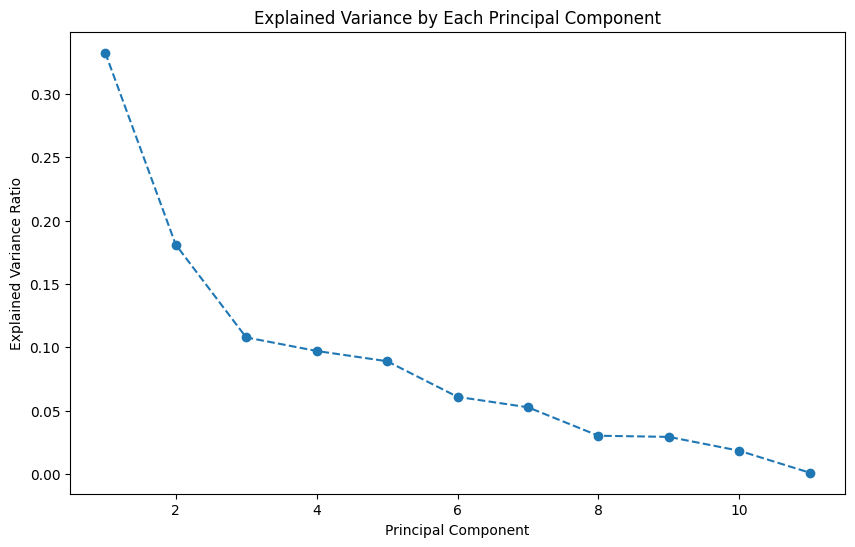

In [369]:
# Plot the explained variance ratio (Scree Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

Dapat dilihat bahwa nilai semakin turun untuk setiap PC (principal component)

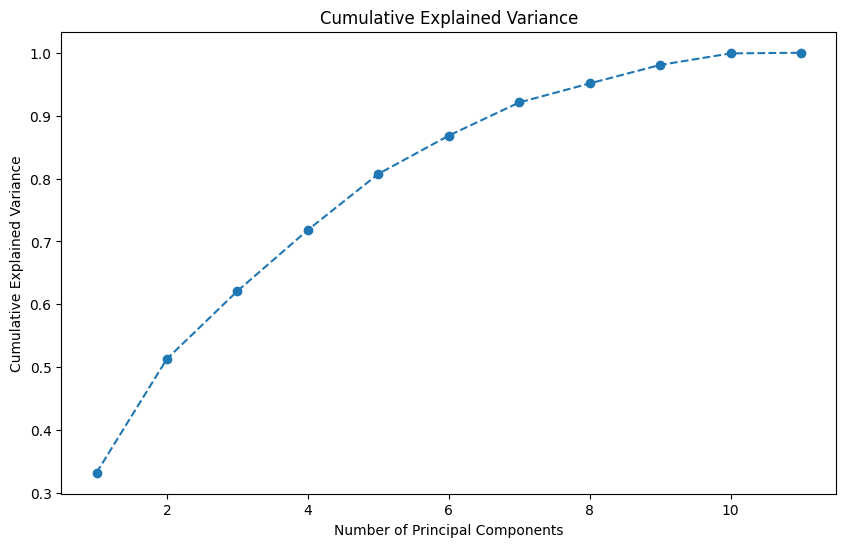

In [370]:
# Cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [371]:
# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Create a dataframe detailing variance per each dimension
variance_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance': cumulative_variance
})

variance_df

,Principal Component,Explained Variance Ratio,Cumulative Variance
0,1,0.332374,0.332374
1,2,0.180997,0.513371
2,3,0.107815,0.621185
3,4,0.097113,0.718298
4,5,0.089028,0.807326
5,6,0.060928,0.868254
6,7,0.052694,0.920948
7,8,0.030254,0.951202
8,9,0.029337,0.980539
9,10,0.018389,0.998929


Dapat diambil kesimpulan bahwa, untuk mereservasi >90% explained variance pada data, diperlukan setidaknya 7 Principal Components (dari total 11 Principal Components). Dengan 7 Principal Components tersebut, kita bisa mendapatkan informasi sebesar 92%

## PCA dengan n_components=7

In [372]:
# Apply PCA with n_components=7 (keeping only the top 7 components)
pca = PCA(n_components=7)
pca_result_7 = pca.fit_transform(df_scaled)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Print explained variance ratio for each component
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.2f}")

# Create a DataFrame for the 7 principal components
df_pca_7 = pd.DataFrame(pca_result_7, columns=[f'PC{i+1}' for i in range(7)])

df_pca_7.head()

Principal Component 1: 0.33
Principal Component 2: 0.18
Principal Component 3: 0.11
Principal Component 4: 0.10
Principal Component 5: 0.09
Principal Component 6: 0.06
Principal Component 7: 0.05


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,4.396221,0.336858,2.803430,-0.926284,-0.098856,0.080267,0.440223
1,5.350005,-0.230927,1.945494,-0.615878,-0.952045,0.690623,-0.101424
2,5.678489,0.253281,2.139679,-0.812553,-1.108042,0.718996,-0.378602
3,5.512991,-0.023453,2.011161,-0.723613,-1.037896,0.711463,-0.135575
4,5.178393,-0.548876,1.736012,-0.423863,-0.758219,0.660964,0.044432


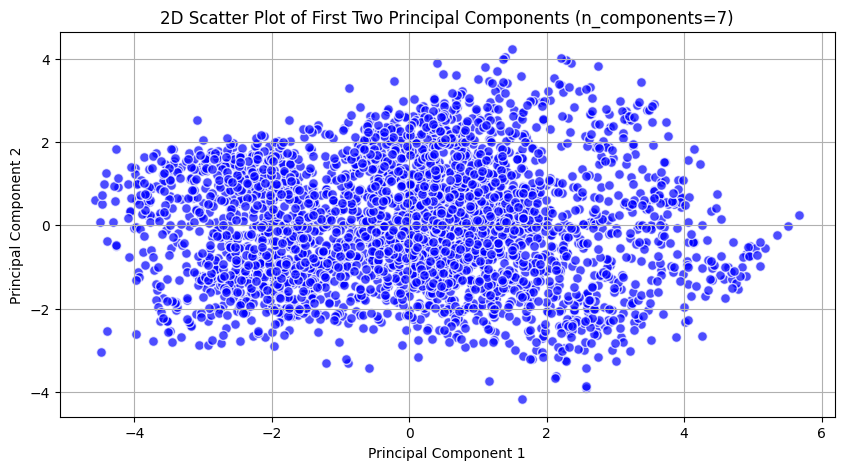

In [373]:
# Plot the first two components in a 2D scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(df_pca_7['PC1'], df_pca_7['PC2'], alpha=0.7, edgecolors='w', s=50, color='blue')
plt.title('2D Scatter Plot of First Two Principal Components (n_components=7)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


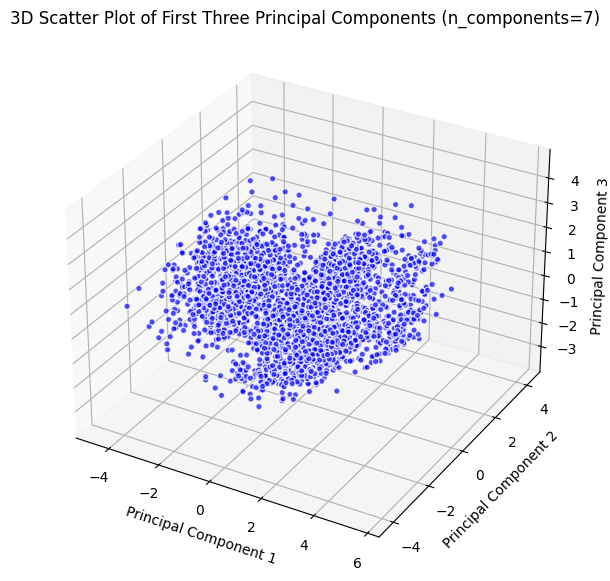

In [374]:
# Plot the first three components in a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extract the first three principal components
pc1 = df_pca_7['PC1']
pc2 = df_pca_7['PC2']
pc3 = df_pca_7['PC3']

ax.scatter(pc1, pc2, pc3, alpha=0.7, edgecolors='w', color='blue')
ax.set_title('3D Scatter Plot of First Three Principal Components (n_components=7)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


# Analisis Lain


<Figure size 1000x600 with 0 Axes>

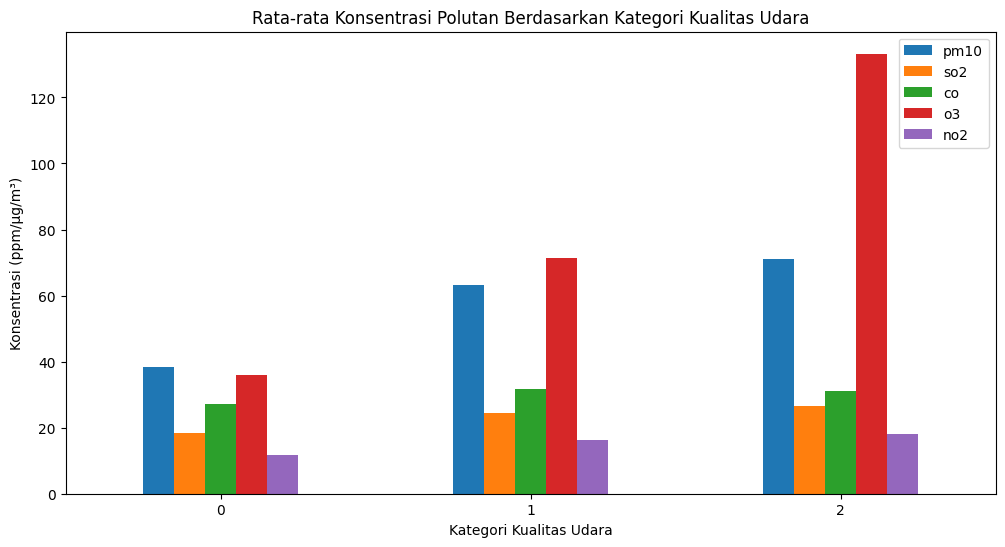

In [385]:
# Bar plot rata-rata polutan berdasarkan kategori
plt.figure(figsize=(10, 6))
df_new.groupby('categori')[['pm10', 'so2', 'co', 'o3', 'no2']].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Rata-rata Konsentrasi Polutan Berdasarkan Kategori Kualitas Udara')
plt.ylabel('Konsentrasi (ppm/µg/m³)')
plt.xlabel('Kategori Kualitas Udara')
plt.xticks(rotation=0)
plt.show()
